In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#https://www.youtube.com/watch?v=Qa2APhWjQPc
#youtube.com/watch?v=kHZBy1uVNnM

In [33]:
bills = [34, 108, 64, 88, 99, 51]
tips =  [5,  17,  11, 8,  14, 5]
bills_mean = statistics.mean(bills)
tips_mean = statistics.mean(tips)
print("{0}\n{1}".format(bills_mean, tips_mean))

74
10


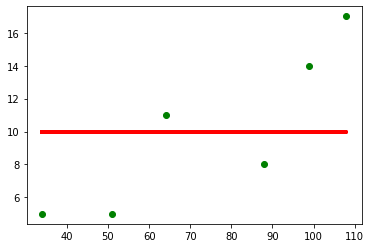

In [4]:
plt.scatter(bills, tips,  color='green')
#plt.scatter([10,50], [20,30],  color='black')
plt.plot(bills,[tips_mean for tm in range(len(bills))], color='red', linewidth=4)
plt.show()

In [5]:
#x - mean(x)
bill_deviations = [bill - bills_mean for bill in bills]
bill_deviations

[-40, 34, -10, 14, 25, -23]

In [6]:
tip_deviations = [tip - tips_mean for tip in tips]
tip_deviations

[-5, 7, 1, -2, 4, -5]

In [7]:
squared_deviations = [e**2 for e in tip_deviations]
squared_deviations

[25, 49, 1, 4, 16, 25]

In [8]:
#SSE - sum of squared errros (should be as low as possible, for the model to be considered a good fit)
#SST = sum of total squares
#SSR = sum of error due to regression
#SSR = SST - SSE

In [9]:
sst = sum(squared_deviations)
sst

120

In [10]:
def tip_regression(x):
    result = round((0.1462 * x) - 0.8188, 4)
    return result

In [11]:
predicted_amount = [tip_regression(bill) for bill in bills]
predicted_amount

[4.152, 14.9708, 8.538, 12.0468, 13.655, 6.6374]

In [12]:
#error = tips - predicted_amount
error = [round(tip - predicted, 4) for tip, predicted in zip(tips, predicted_amount)]
print(error)
squared_error = [round(e**2,4) for e in error] #SSE
print(squared_error)
sse = (sum(squared_error)) 
sse

[0.848, 2.0292, 2.462, -4.0468, 0.345, -1.6374]
[0.7191, 4.1177, 6.0614, 16.3766, 0.119, 2.6811]


30.0749

In [13]:
# coefficient of determination = r**2 = SSR/SST
# 74.9% of the total sum of squares can be explained by using the estimated regression equation to predict the tip amount. 
# The rest is an error.

ssr = sst - sse
print(ssr)
coeficient_of_determination = ssr/sst
coeficient_of_determination

89.9251


0.7493758333333334

In [14]:
deviation_products = [b*t for b,t in zip(bill_deviations,tip_deviations)]
deviation_products

[200, 238, -10, -28, 100, 115]

In [15]:
sum_deviation = sum(deviation_products)
sum_deviation

615

In [16]:
bill_deviations_squared = [bill_d ** 2 for bill_d in bill_deviations]
bill_deviations_squared

[1600, 1156, 100, 196, 625, 529]

In [17]:
sum_bill_deviations_squared = sum(bill_deviations_squared)
sum_bill_deviations_squared

4206

In [18]:
# slope of the regression line:
slope = sum_deviation / sum_bill_deviations_squared
slope = round(slope,4)
print("{0} / {1} = {2}".format(sum_deviation, sum_bill_deviations_squared, slope))

615 / 4206 = 0.1462


In [19]:
# intersept
# b0 = yLINE - b1xLINE
b0 = tips_mean - slope * bills_mean
print("{0:.4f}".format(b0))

-0.8188


In [20]:
# Regression line:
#     y = 0.1462x -0.8188
# for every dollar, we expect an increase of 15 cents
# if the bill amount is 0, then the tip is negative 82 cents... Sometimes it does not make sense.

In [21]:
x = np.array(bills).reshape(-1, 1)
y = np.array(tips)

#model = LinearRegression()

In [22]:
model = LinearRegression().fit(x, y)

In [23]:
model.score(x,y)

0.7493758915834522

In [24]:
model.predict(x)

array([ 4.15121255, 14.97146933,  8.53780314, 12.04707561, 13.65549215,
        6.63694722])

In [25]:
model.coef_

array([0.14621969])

In [26]:
model.score(x,y)

0.7493758915834522

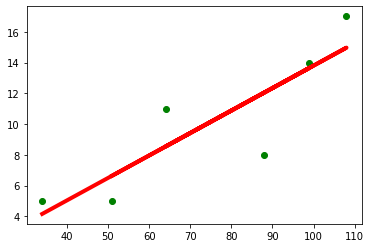

In [27]:
plt.scatter(x, y, color='green')
plt.plot(x, model.predict(x), color='red', linewidth=4)
plt.show()

In [28]:
## Linear Regression, Standardized Regression
#youtube.com/watch?v=_7pSUXwjEO8

In [50]:
#Standardizing the bill values
stdev_bills = statistics.stdev(bills)
print(stdev_bills)

z_bill = [round((bill - bills_mean)/stdev_bills,4) for bill in bills]
print(z_bill)

29.003448070875987
[-1.3791, 1.1723, -0.3448, 0.4827, 0.862, -0.793]


In [51]:
#Standardizing the bill values
stdev_tips = statistics.stdev(tips)
print(stdev_tips)

z_tips = [round((tip - tips_mean)/stdev_tips,4) for tip in tips]
print(z_tips)

4.898979485566356
[-1.0206, 1.4289, 0.2041, -0.4082, 0.8165, -1.0206]
